In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
data = pd.read_csv("CincinnatiPaintCompany.csv")
data.shape

(25, 3)

In [21]:
data.head()

,Comisiones,Llamadas,Millas_recorridas
0,22,139,2371
1,13,132,2226
2,33,144,2731
3,38,142,3351
4,23,142,2289


In [22]:
# Variables independientes
dataX = data[["Millas_recorridas", "Llamadas"]]

XY_train = np.array(dataX)
z_train = data["Comisiones"].values

# Creamos y entrenamos el modelo
regr = linear_model.LinearRegression()
regr.fit(XY_train, z_train)

# Predicción de los datos
z_pred = regr.predict(XY_train)

print("Coeficientes:\n", regr.coef_)
print("Intersección:\n", regr.intercept_)
print("Error cuadrático medio: %.2f" % mean_squared_error(z_train, z_pred))
print("Varianza (R2): %.4f" % r2_score(z_train, z_pred))

Coeficientes:
 [0.01568925 0.63233256]
Intersección:
 -101.31444968276467
Error cuadrático medio: 16.31
Varianza (R2): 0.8353


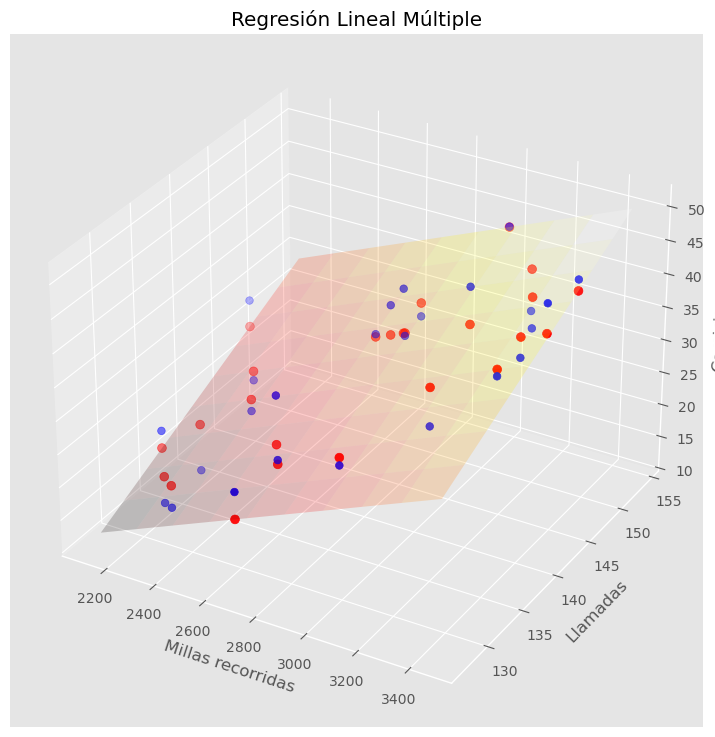

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

xx, yy = np.meshgrid(
    np.linspace(data["Millas_recorridas"].min(), data["Millas_recorridas"].max(), 10),
    np.linspace(data["Llamadas"].min(), data["Llamadas"].max(), 10),
)

z = regr.coef_[0] * xx + regr.coef_[1] * yy + regr.intercept_
ax.plot_surface(xx, yy, z, alpha=0.2, cmap="hot")
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c="blue", s=30)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c="red", s=40)

ax.set_xlabel("Millas recorridas")
ax.set_ylabel("Llamadas")
ax.set_zlabel("Comisiones")
ax.set_title("Regresión Lineal Múltiple")

plt.show()

# Análisis

La gráfica de correlación múltiple muestra un plano de regresión ascendente (positivo), indicando que existe una relación directa entre las variables millas recorridas y llamadas realizadas con respecto a las comisiones. Es decir, a medida que aumentan estas dos variables, las comisiones también tienden a incrementarse. Asimismo, la cercanía de los puntos al plano indica que el modelo presenta un buen ajuste. Al comprobar el resultado mediante el coeficiente de determinación R² = 0.8353, se observa que el 83.53% de la variabilidad de las comisiones es explicada por ambas variables independientes, lo que confirma que la correlación múltiple es fuerte y que el análisis gráfico es consistente con el resultado numérico.